In [1]:
import pandas as pd
import numpy as np
from pyjet import cluster,DTYPE_PTEPM
import math
import h5py
import matplotlib.pyplot as plt

In [2]:
# m_12 = sqrt ( (E_1 + E_2)^2 - (p_x1 + p_x2)^2 - (p_y1 + p_y2)^2 - (p_z1 + p_z2)^2 )
def invariant_mass(jet1, jet2):
    return math.sqrt((jet1.e + jet2.e)**2 - (jet1.px + jet2.px)**2 - (jet1.py + jet2.py)**2 - (jet1.pz + jet2.pz)**2)

In [3]:
path = '/anomalyvol/data/jet_ver/bb1_jet_mass.h5'

In [4]:
chunk_size = 100000
total_size = 1000000 # 1 mil max

def generator(path, chunk_size=10000,total_size=1000000):
    i = 0
    
    while True:
        yield pd.read_hdf(path,start=i*chunk_size, stop=(i+1)*chunk_size)
        
        i+=1
        if (i+1)*chunk_size > total_size:
            i=0

gen = generator(path, chunk_size, total_size)

In [5]:
# fully load in pandas dataframe
data = next(gen)

for i in range(total_size // chunk_size - 1):
    data.append(next(gen))

data

,mass
0,3157.841212
1,2488.262160
2,3499.867409
3,2729.477504
4,2513.728451
...,...
99995,2793.668164
99996,2949.037392
99997,2434.859286
99998,4568.112669


In [6]:
loaded_data = data
# data = loaded_data

array([   0.        ,  101.26582278,  202.53164557,  303.79746835,
        405.06329114,  506.32911392,  607.59493671,  708.86075949,
        810.12658228,  911.39240506, 1012.65822785, 1113.92405063,
       1215.18987342, 1316.4556962 , 1417.72151899, 1518.98734177,
       1620.25316456, 1721.51898734, 1822.78481013, 1924.05063291,
       2025.3164557 , 2126.58227848, 2227.84810127, 2329.11392405,
       2430.37974684, 2531.64556962, 2632.91139241, 2734.17721519,
       2835.44303797, 2936.70886076, 3037.97468354, 3139.24050633,
       3240.50632911, 3341.7721519 , 3443.03797468, 3544.30379747,
       3645.56962025, 3746.83544304, 3848.10126582, 3949.36708861,
       4050.63291139, 4151.89873418, 4253.16455696, 4354.43037975,
       4455.69620253, 4556.96202532, 4658.2278481 , 4759.49367089,
       4860.75949367, 4962.02531646, 5063.29113924, 5164.55696203,
       5265.82278481, 5367.08860759, 5468.35443038, 5569.62025316,
       5670.88607595, 5772.15189873, 5873.41772152, 5974.68354

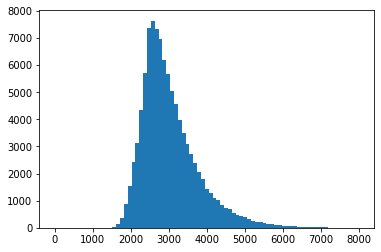

In [27]:
n, bins, patches = plt.hist(data.mass, bins=np.linspace(0,8000,80))
bins

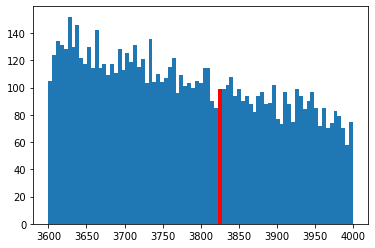

In [30]:
n, bins, patches = plt.hist(data.mass, bins=np.linspace(3600,4000,80))
patches[np.where((bins>=3822) & (bins <= 3823))[0][0]].set_fc('r')
plt.show()